In [2]:
### importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [3]:
### Load the dataset

uber= pd.read_csv(r'Uber Request Data.csv')

In [4]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
uber.shape

(6745, 6)

There are 6745 rows and 6 columns of data

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


As we can see request and drop timestamp columns need to be changed to datetime datatype for further analysis

In [7]:
### checking null values

uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
### Percentage of null values

def percentage_of_null_values_per_column(uber):
    missing_values_count_per_column = uber.isnull().sum()
    total_cells_per_column = uber.shape[0]
    percentage_missing_per_column = (missing_values_count_per_column / total_cells_per_column) * 100
    return percentage_missing_per_column

percentage_per_column = percentage_of_null_values_per_column(uber)
print("Percentage of missing values per column:")
print(percentage_per_column)

Percentage of missing values per column:
Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


More than 50% of data is missing in drop timestamp column and 39% is missing in driver id column
Around 40% of Driver Id is null because of Cancelled Trips which makes sense

In [9]:
### duplicate values

uber.duplicated().sum()

0

In [10]:
### Unique values in each column

uber.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [11]:
uber[uber['Drop timestamp'].isnull()].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

'Drop timestamp' is empty when the status of the trip is either cancelled or no cars are available because the trips did not occur. Hence null values are valid

In [12]:
uber[uber['Driver id'].isnull()].groupby('Status').size()

Status
No Cars Available    2650
dtype: int64

Driver id is null in case if no cars are avalaible which is valid. Hence this dataset does not contain any missing values

In [5]:
### Changing the datatype of request and drop timestamp

uber['Request timestamp1'] = pd.to_datetime(uber['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = uber['Request timestamp1'].isnull()
uber.loc[mask, 'Request timestamp1'] = pd.to_datetime(uber[mask]['Request timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

uber['Drop timestamp1'] = pd.to_datetime(uber['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = uber['Drop timestamp1'].isnull()
uber.loc[mask, 'Drop timestamp1'] = pd.to_datetime(uber[mask]['Drop timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

In [6]:
uber.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Drop timestamp1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


### Data Wrangling


In [7]:
### Creating a copy of raw data

df_uber= uber.copy()

In [31]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Drop timestamp1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [8]:
### Dropping unnecessary columns

df_uber.drop(['Driver id','Request timestamp','Drop timestamp'], axis=1, inplace= True )

In [9]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Request id          6745 non-null   int64         
 1   Pickup point        6745 non-null   object        
 2   Status              6745 non-null   object        
 3   Request timestamp1  6745 non-null   datetime64[ns]
 4   Drop timestamp1     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


### Feature Engineering


In [10]:
### Extracting date, day and hour from request timestamp column

df_uber["Request date"] = df_uber["Request timestamp1"].dt.date
df_uber["Request hour"] = df_uber["Request timestamp1"].dt.hour
df_uber["Request day"] = df_uber["Request timestamp1"].dt.day_name()

In [11]:
### Extracting date, day and hour from drop timestamp column

df_uber["Drop date"] = df_uber["Drop timestamp1"].dt.date
df_uber["Drop hour"] = df_uber["Drop timestamp1"].dt.hour
df_uber["Drop day"] = df_uber["Drop timestamp1"].dt.day_name()

In [12]:
df_uber.head()

,Request id,Pickup point,Status,Request timestamp1,Drop timestamp1,Request date,Request hour,Request day,Drop date,Drop hour,Drop day
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,2016-07-11,13.0,Monday
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,2016-07-11,18.0,Monday
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,2016-07-12,9.0,Tuesday
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,2016-07-12,22.0,Tuesday
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,2016-07-13,9.0,Wednesday


In [13]:
# Categorizing the drop hour and request hour columns

# Late Night: 12 AM to 4 AM
# Early Morning: 4 AM to 8 AM
# Late Morning: 8 AM to 12 PM
# Afternoon: 12 PM to 4 PM
# Evening: 4 PM to 8 PM
# Night: 8 PM to 12 AM

labels = ["Late night", "Early morning","Late morning", "Afternoon","Evening", "Night"]
bins = [1,4,8,12,16,20,24]

In [14]:
df_uber['Request hour slot'] = pd.cut(df_uber['Request hour'], bins, labels = labels)

df_uber['Drop hour slot'] = pd.cut(df_uber['Drop hour'], bins, labels = labels)

In [15]:
df_uber.head()

,Request id,Pickup point,Status,Request timestamp1,Drop timestamp1,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,2016-07-11,13.0,Monday,Late morning,Afternoon
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,2016-07-11,18.0,Monday,Evening,Evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,2016-07-12,9.0,Tuesday,Late morning,Late morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,2016-07-12,22.0,Tuesday,Night,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,2016-07-13,9.0,Wednesday,Early morning,Late morning


In [16]:
### Calculating trip duration

df_uber['difference'] = df_uber['Drop timestamp1'] - df_uber['Request timestamp1']

In [46]:
df_uber.head()

,Request id,Pickup point,Status,Request timestamp1,Drop timestamp1,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot,difference
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,2016-07-11,13.0,Monday,Late morning,Afternoon,0 days 01:09:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,2016-07-11,18.0,Monday,Evening,Evening,0 days 00:50:00
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,2016-07-12,9.0,Tuesday,Late morning,Late morning,0 days 00:41:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,2016-07-12,22.0,Tuesday,Night,Night,0 days 00:55:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,2016-07-13,9.0,Wednesday,Early morning,Late morning,0 days 00:52:31


In [17]:
df_uber['difference'] = pd.to_timedelta(df_uber['difference'])


df_uber['time_diff_seconds'] = df_uber['difference'].dt.total_seconds()

In [49]:
df_uber.head()

,Request id,Pickup point,Status,Request timestamp1,Drop timestamp1,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot,difference,time_diff_seconds
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,2016-07-11,13.0,Monday,Late morning,Afternoon,0 days 01:09:00,4140.0
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,2016-07-11,18.0,Monday,Evening,Evening,0 days 00:50:00,3000.0
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,2016-07-12,9.0,Tuesday,Late morning,Late morning,0 days 00:41:00,2460.0
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,2016-07-12,22.0,Tuesday,Night,Night,0 days 00:55:00,3300.0
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,2016-07-13,9.0,Wednesday,Early morning,Late morning,0 days 00:52:31,3151.0


In [18]:
### Trip duration in hours

df_uber['trip_duration_hours'] = df_uber['time_diff_seconds']/3600

In [20]:
### Trip duration in  minutes

df_uber['trip_duration_mins']= df_uber['time_diff_seconds']/60

In [31]:
df_uber['trip_duration_mins']= df_uber['trip_duration_mins'].round()

In [32]:
df_uber.head(10)

,Request id,Pickup point,Status,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot,trip_duration_hours,trip_duration_mins,trip duration_mins,trip duration_hours
0,619,Airport,Trip Completed,2016-07-11,11,Monday,2016-07-11,13.0,Monday,Late morning,Afternoon,1.150000,69.0,NaN,NaN
1,867,Airport,Trip Completed,2016-07-11,17,Monday,2016-07-11,18.0,Monday,Evening,Evening,0.833333,50.0,NaN,NaN
2,1807,City,Trip Completed,2016-07-12,9,Tuesday,2016-07-12,9.0,Tuesday,Late morning,Late morning,0.683333,41.0,NaN,NaN
3,2532,Airport,Trip Completed,2016-07-12,21,Tuesday,2016-07-12,22.0,Tuesday,Night,Night,0.916667,55.0,NaN,NaN
4,3112,City,Trip Completed,2016-07-13,8,Wednesday,2016-07-13,9.0,Wednesday,Early morning,Late morning,0.875278,53.0,NaN,NaN
5,3879,Airport,Trip Completed,2016-07-13,21,Wednesday,2016-07-13,22.0,Wednesday,Night,Night,0.525278,32.0,NaN,NaN
6,4270,Airport,Trip Completed,2016-07-14,6,Thursday,2016-07-14,7.0,Thursday,Early morning,Early morning,0.961944,58.0,NaN,NaN
7,5510,Airport,Trip Completed,2016-07-15,5,Friday,2016-07-15,6.0,Friday,Early morning,Early morning,0.933333,56.0,NaN,NaN
8,6248,City,Trip Completed,2016-07-15,17,Friday,2016-07-15,18.0,Friday,Evening,Evening,0.890000,53.0,NaN,NaN
9,267,City,Trip Completed,2016-07-11,6,Monday,2016-07-11,7.0,Monday,Early morning,Early morning,0.650000,39.0,NaN,NaN


In [83]:
df_uber.drop(['trip duration_mins', 'trip duration_hours'], axis= 1, inplace= True)

In [22]:
### Deleting columns

df_uber.drop(['Request timestamp1', 'Drop timestamp1', 'difference', 'time_diff_seconds'], axis =1, inplace = True)

In [23]:
df_uber[df_uber['Status'] == "Cancelled"].head()

,Request id,Pickup point,Status,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot,trip_duration_hours,trip_duration_mins
2831,2905,City,Cancelled,2016-07-13,6,Wednesday,NaT,NaN,NaN,Early morning,NaN,NaN,NaN
2832,4805,City,Cancelled,2016-07-14,17,Thursday,NaT,NaN,NaN,Evening,NaN,NaN,NaN
2833,5202,Airport,Cancelled,2016-07-14,20,Thursday,NaT,NaN,NaN,Evening,NaN,NaN,NaN
2834,5927,City,Cancelled,2016-07-15,10,Friday,NaT,NaN,NaN,Late morning,NaN,NaN,NaN
2835,2347,Airport,Cancelled,2016-07-12,19,Tuesday,NaT,NaN,NaN,Evening,NaN,NaN,NaN


In [24]:
# Set the drop columns and trip duration to NaN when status is cancelled and no cars available 

df_uber.loc[df_uber['Status'] == "No Cars Available",['Drop date','Drop hour', 'Drop day', 'Drop hour slot', 'trip duration_mins', 'trip duration_hours']] = np.nan
df_uber.loc[df_uber['Status'] == "Cancelled",['Drop date','Drop hour','Drop day', 'Drop hour slot', 'trip duration_mins', 'trip duration_hours']] = np.nan

df_uber[df_uber['Status'] == "Cancelled"].head()

,Request id,Pickup point,Status,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot,trip_duration_hours,trip_duration_mins,trip duration_mins,trip duration_hours
2831,2905,City,Cancelled,2016-07-13,6,Wednesday,NaN,NaN,NaN,Early morning,NaN,NaN,NaN,NaN,NaN
2832,4805,City,Cancelled,2016-07-14,17,Thursday,NaN,NaN,NaN,Evening,NaN,NaN,NaN,NaN,NaN
2833,5202,Airport,Cancelled,2016-07-14,20,Thursday,NaN,NaN,NaN,Evening,NaN,NaN,NaN,NaN,NaN
2834,5927,City,Cancelled,2016-07-15,10,Friday,NaN,NaN,NaN,Late morning,NaN,NaN,NaN,NaN,NaN
2835,2347,Airport,Cancelled,2016-07-12,19,Tuesday,NaN,NaN,NaN,Evening,NaN,NaN,NaN,NaN,NaN


In [27]:
df_uber['trip_duration_mins'].max()

83.0

In [33]:
df_uber['trip_duration_mins'].min()

21.0

In [43]:
### creating bins for trip duration, every 15 mins

df_uber['trip duration slot'] = pd.cut(x=df_uber['trip_duration_mins'], bins=[1, 15, 30, 45, 60, 75, 90] , labels=['1 to 15', '16 to 30', '31 to 45', '46 to 60', '61 to 75', '75 to 90'])

In [44]:
df_uber['trip duration slot'].value_counts()

46 to 60    937
31 to 45    854
61 to 75    806
16 to 30    138
75 to 90     96
1 to 15       0
Name: trip duration slot, dtype: int64

In [45]:
# Checking if the column is binned by comparing the counts

print(df_uber['trip duration slot'].value_counts().sum())
print(df_uber.Status.value_counts())

2831
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


### Data Visualization


### Univariate Analysis

In [48]:
# function to plot countplots for univariate analysis

def univariate_analysis(col):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=df_uber,x=col)

    plt.title("Summary of trips, countplot of {}".format(col))
    plt.xlabel("{} of trip".format(col))
    plt.ylabel("Number of trips")

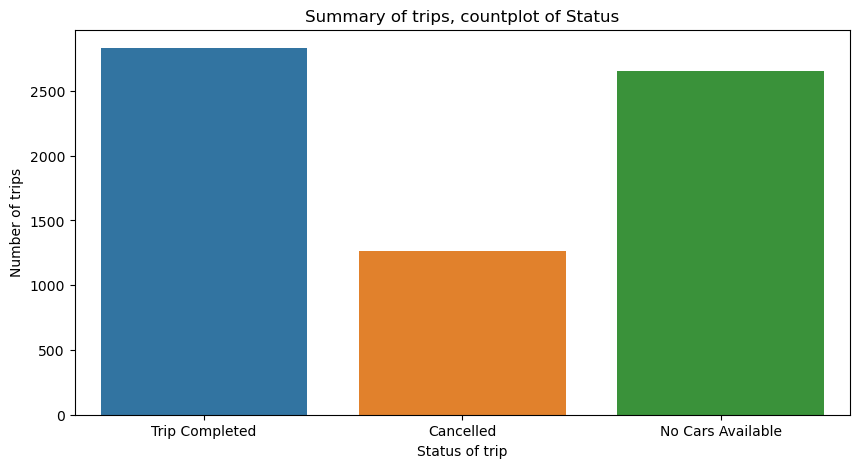

In [49]:
univariate_analysis("Status")

In [81]:
percentage = df_uber['Status'].value_counts(normalize= True)*100
print(percentage)


Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64


There are more percentage of cars not available than cancelled trip.
Only 42% trip are being completed
58% requests are not met by Uber
This indicates major supply deficiency of Uber cabs

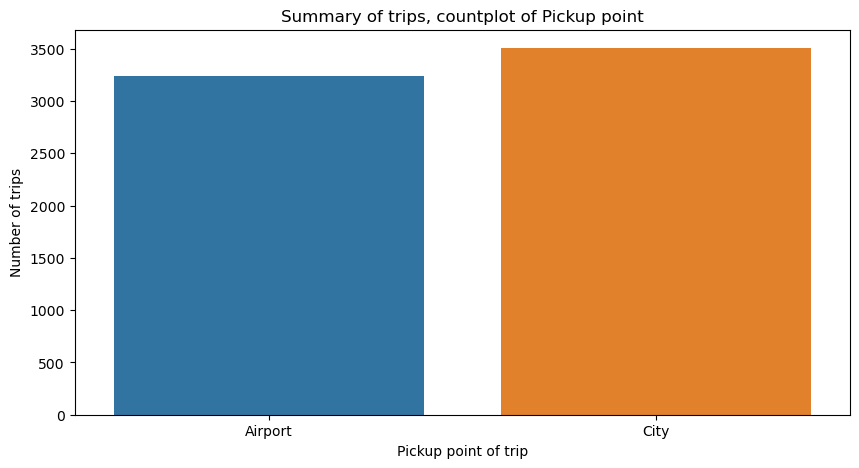

In [51]:
univariate_analysis("Pickup point")

City is the preferred pickup point
The requests are met more when city is the pickup point


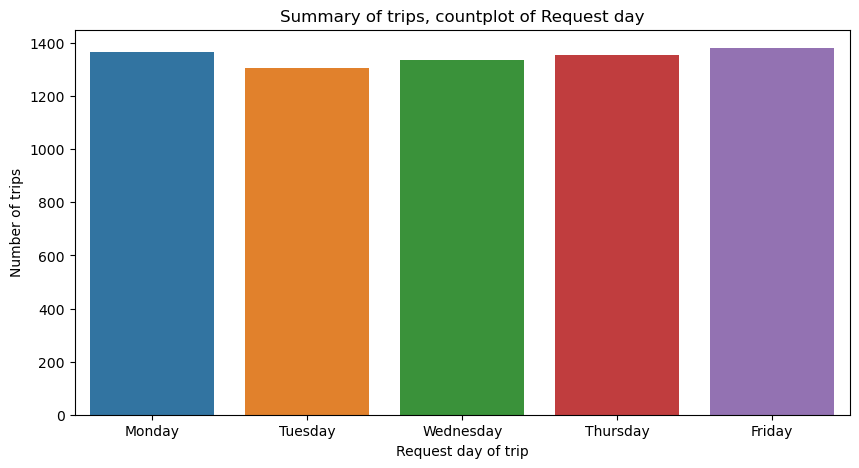

In [52]:
univariate_analysis("Request day")

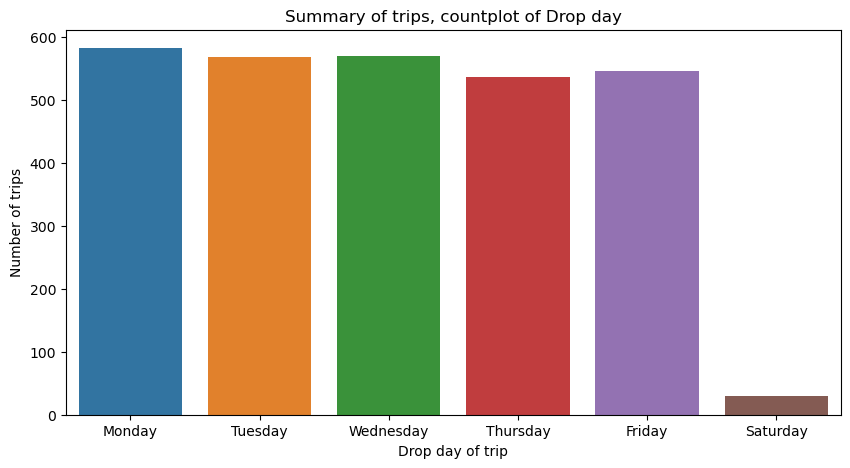

In [53]:
univariate_analysis("Drop day")

Maximum requests for Uber are on Mondays which can be inferred by request day and drop day count plots. Minimum requests are on Saturdays

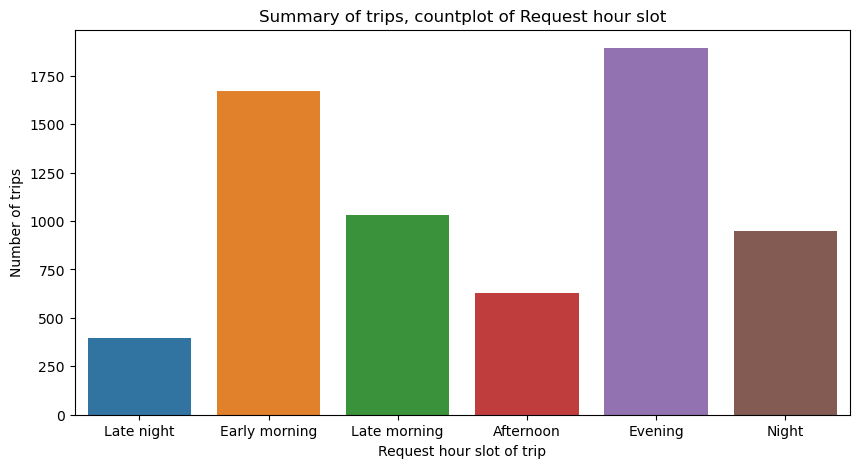

In [54]:
univariate_analysis("Request hour slot")

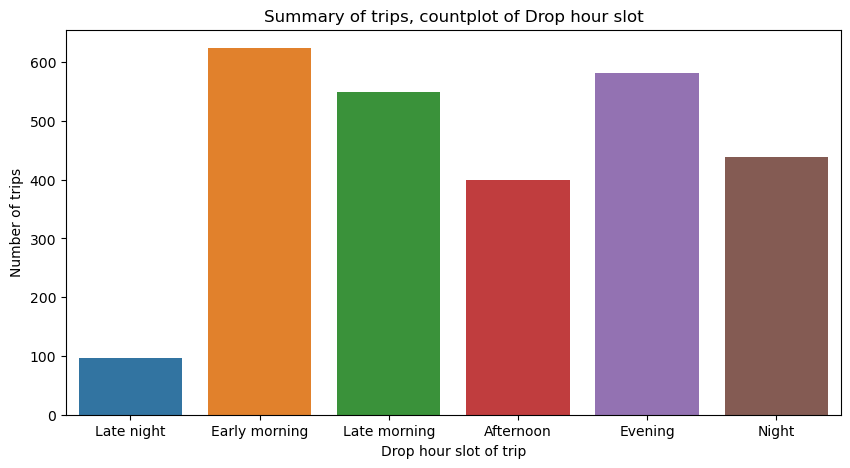

In [55]:
univariate_analysis("Drop hour slot")

Passsengers requests for cabs are highest during early morning and evening hours which is evident from the above two countplots of request and drop hour time slot

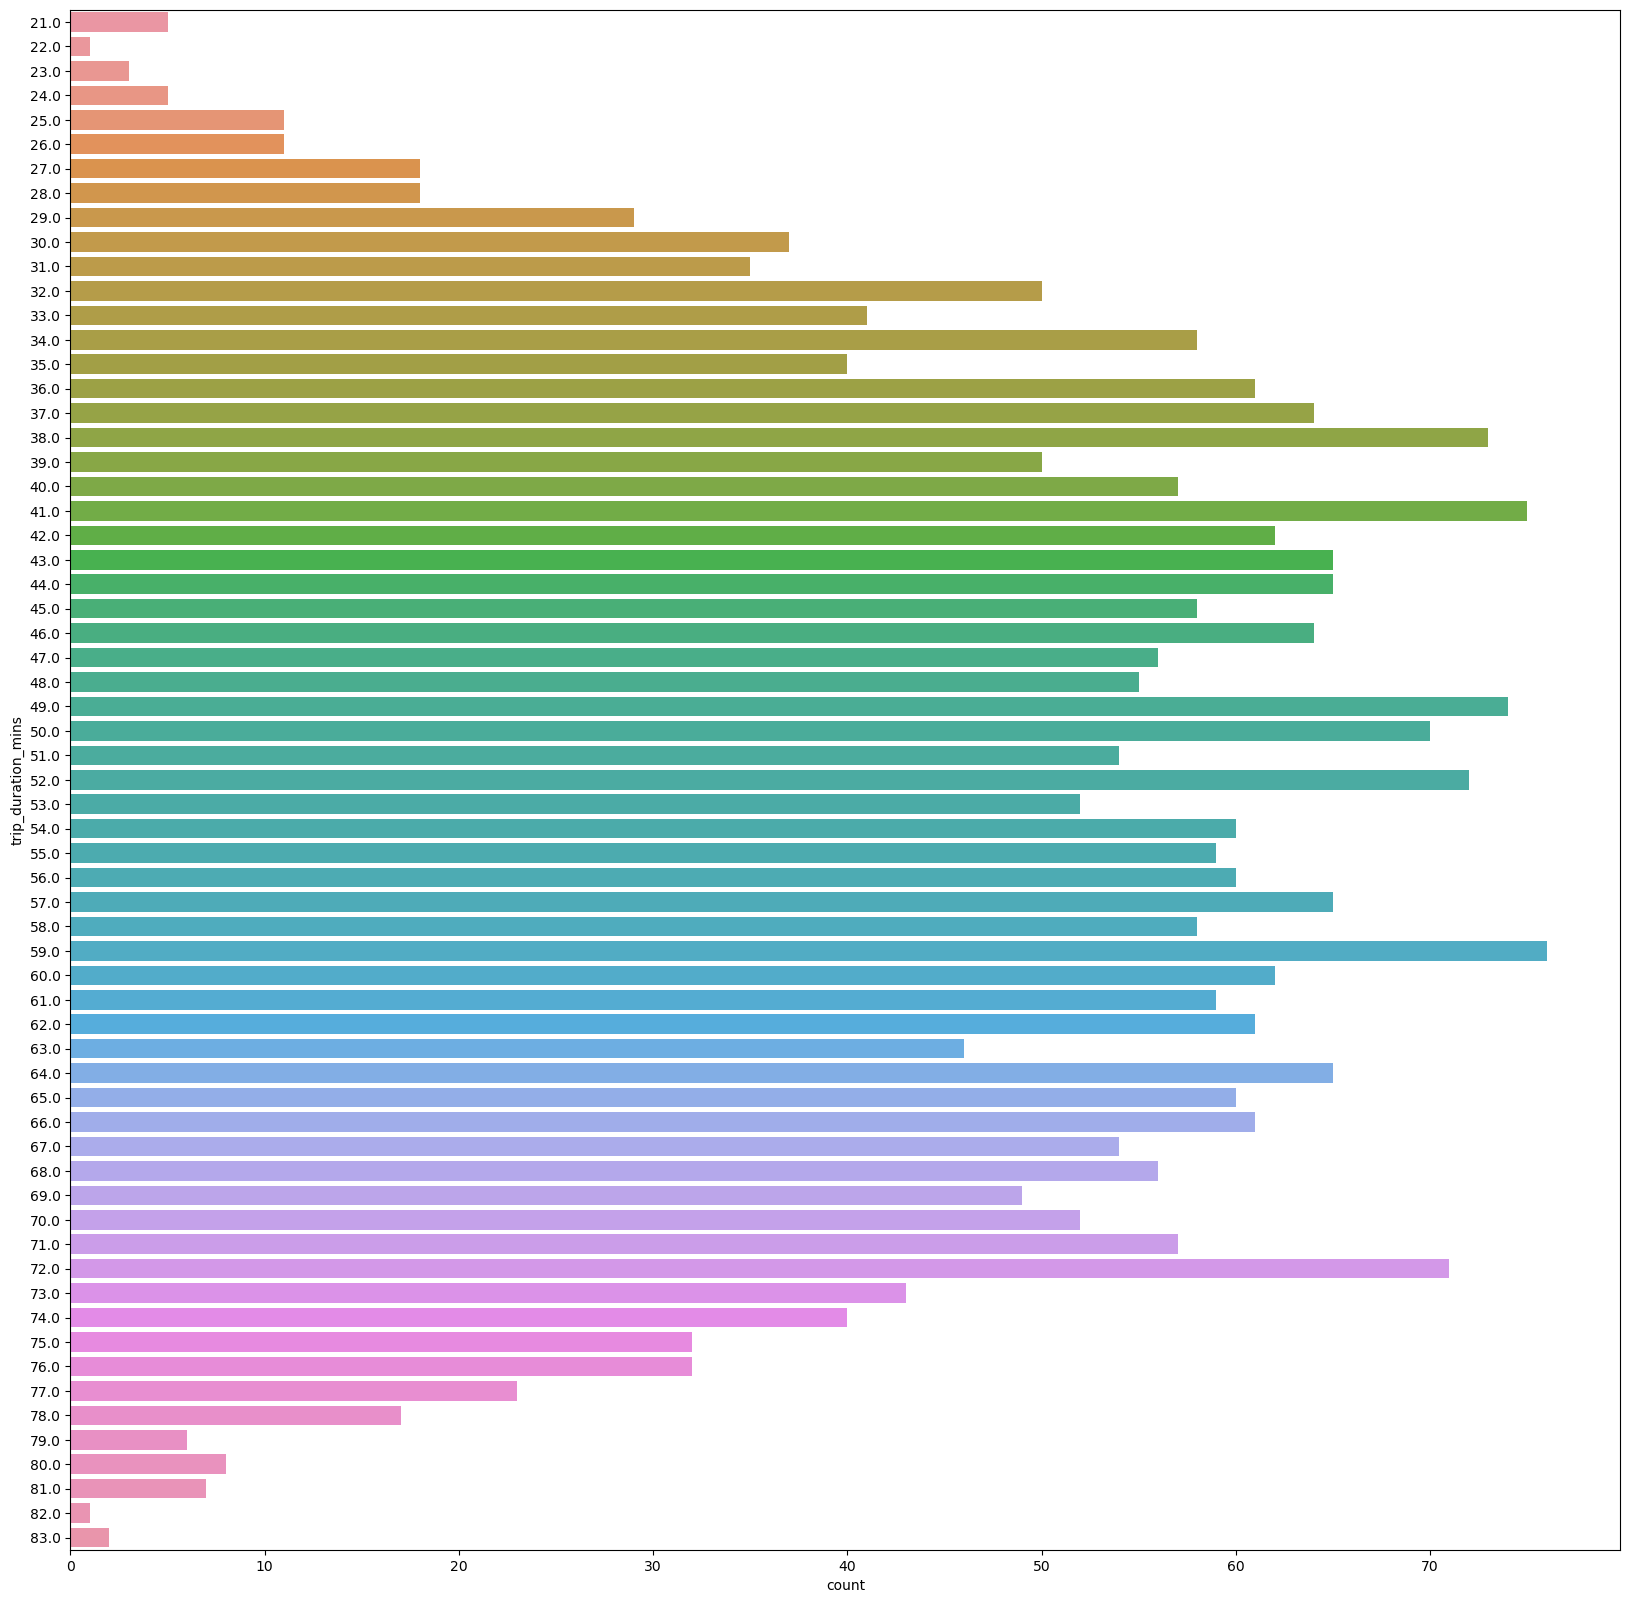

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(20,20))
sns.countplot(data=df_uber, y="trip_duration_mins")
plt.show()
plt.tight_layout()

Maximum number of trips are of 41 and 59 mins
highest trip duration is of 83 min and lowest is 21 min
No passenger books a cab for travel time less than 21 mins
Maximum number of trips are of 30 to 73 mins duration

### Bivariate Analysis


In [63]:
# function to plt countplots for bivariate analysis

def bivariate_analysis(df, col1, col2):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=df,x=col1, hue=col2)

    plt.title("Summary of trips, countplot of {}".format(col1))
    plt.xlabel("{} of trip".format(col1))
    plt.ylabel("Number of trips")

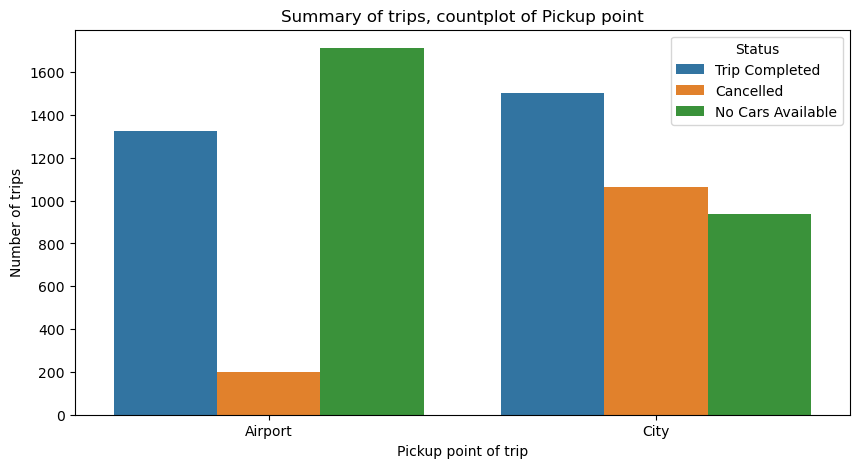

In [64]:
bivariate_analysis(df_uber ,"Pickup point", "Status")

The demand for cabs at the airport is the highest which cannot be fulfilled due to low availability of the cabs. This demand should be met as soon as possible because very few cabs are being cancelled at the airport.
Many rides are cancelled when the pickup point is city

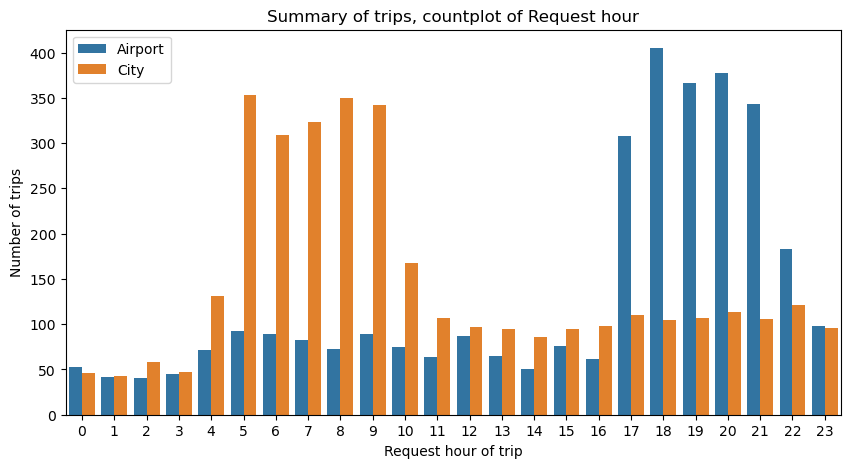

In [67]:
bivariate_analysis(df_uber, "Request hour", "Pickup point")
plt.legend(loc='upper left') 

Maximum number of requests are made by passengers in the city during morning between 5AM to 9AM and for the airports evening till late night(5PM to 10PM) requests are largest
This suggests that during the daytime, passengers travel to the airport from the city.
This also suggests that more passengers land in the evening and travel from airport to the city


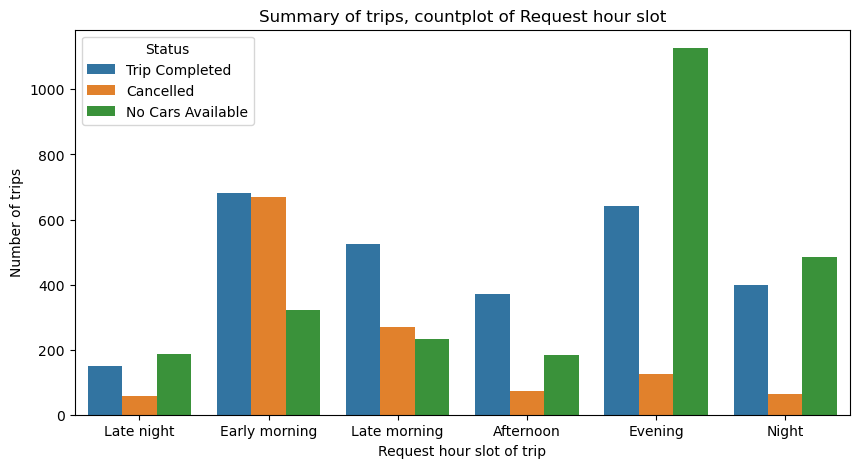

In [69]:
bivariate_analysis(df_uber, "Request hour slot", "Status")

There is a huge unavailabilty of cabs in the evening.
Most of the cabs are cancelled in the early morning time slot
Unavailabilty of cabs is higher in the evening, night and late night timeslots

### Bivariate analysis of city and airport -"Request hour timeslot" against "Status"

In [74]:
### Splitting the dataframe into city and airport for analysis

airport =df_uber[df_uber["Pickup point"] == "Airport"]
city = df_uber[df_uber["Pickup point"] == "City"]

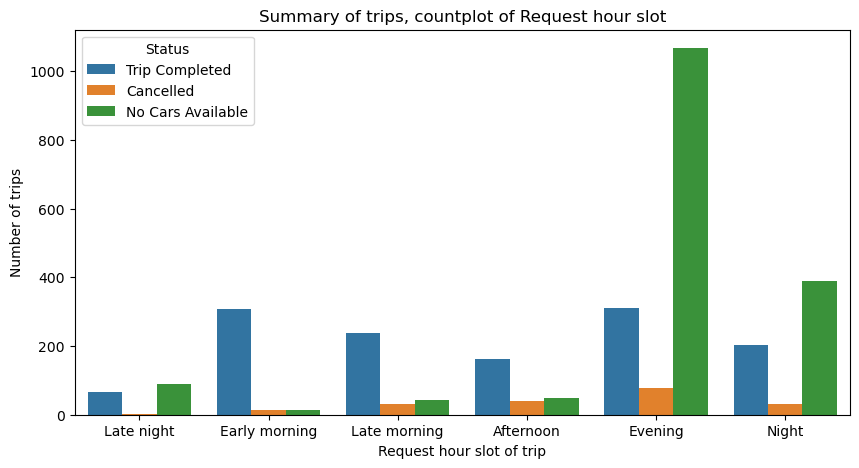

In [75]:
bivariate_analysis(airport, "Request hour slot", "Status")

Cabs are highly unavailable for passengers in the evening and at night time slots
Very few cabs were cancelled at when passengers were picked up from the airport
This high demand of cabs during evening and night time slots at the airport must be immediately fulfilled by Uber

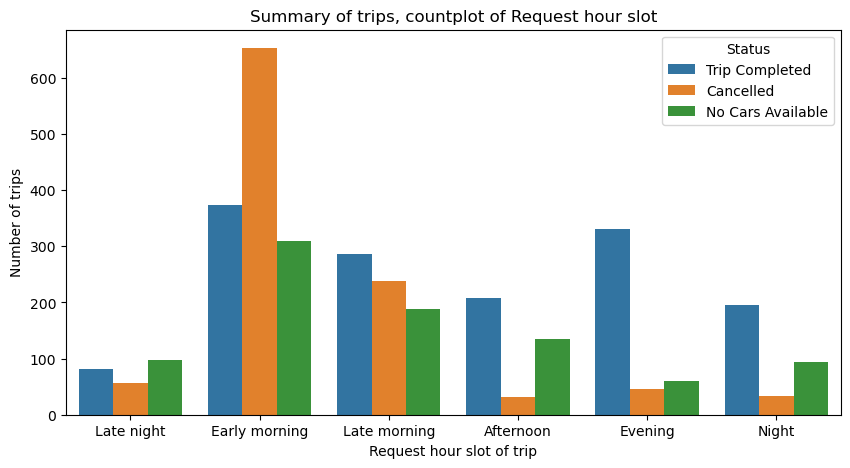

In [76]:
bivariate_analysis(city, "Request hour slot", "Status")

Higher number of cabs were cancelled in the morning timeslot in the city.
Higher number of cabs were unavailable in the mornings too when the pickup point is city.
The drivers somehow don't wish to complete the rides from the city to airport in the morning hours

### Bivariate analysis of city and airport -"trip duration slot" against "Request hour slot"

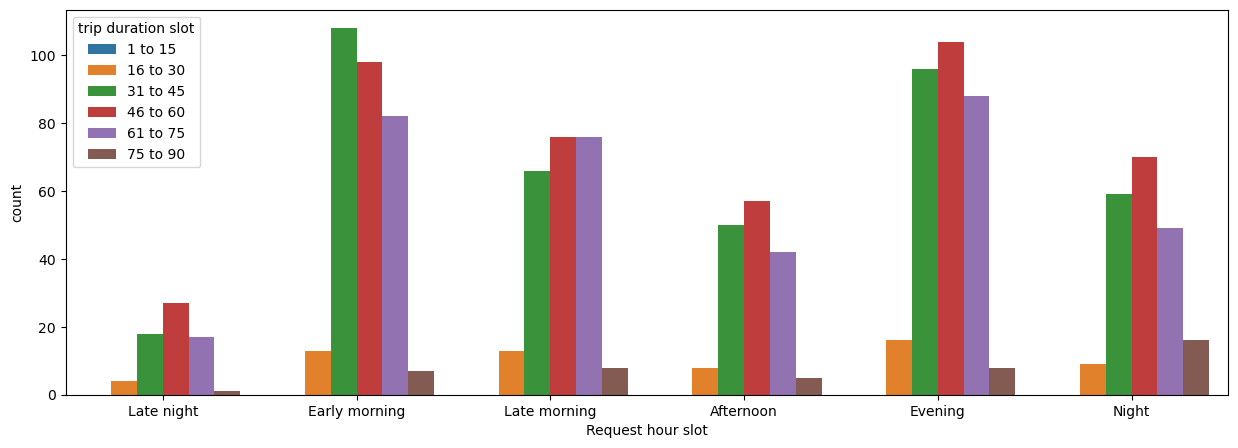

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(data=airport, hue="trip duration slot", x="Request hour slot")
plt.show()

Airport as pickup point-
maximum trips are of 31 to 45 min duration early morning
During evening trips till city take around 45 to 60 mins to complete or even more

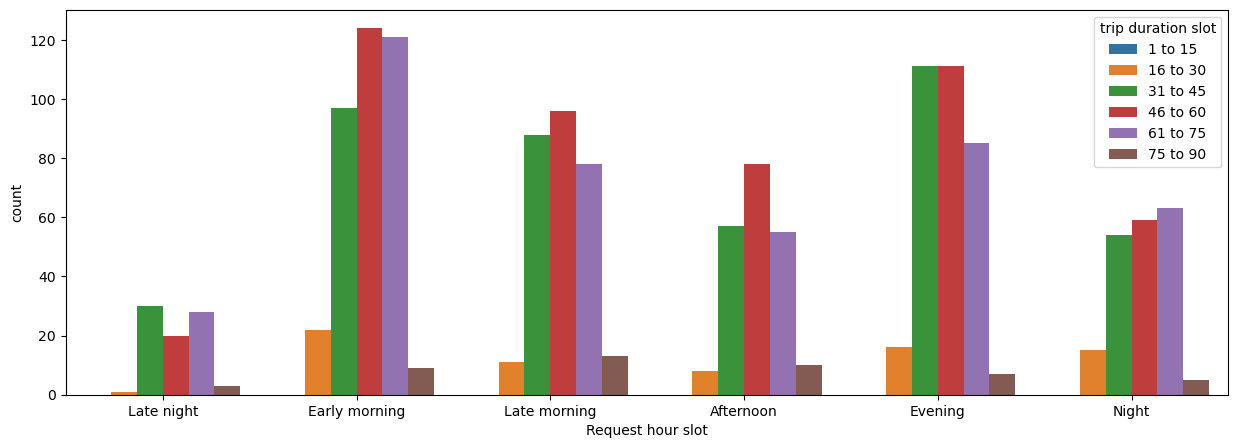

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(data=city, hue="trip duration slot", x="Request hour slot")
plt.show()

Maximum Trips from the city to airport lasts more than a hour during morning and evening time slots

### Supply Demand Analysis


Lets Try to understand the Supply and Demand curve by considering all Trips Completed as Supply and Cancelled and No Cars Available as Demand

In [84]:
### Creating a new column supply and demand

df_uber['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in df_uber['Status']]
df_uber.head()

,Request id,Pickup point,Status,Request date,Request hour,Request day,Drop date,Drop hour,Drop day,Request hour slot,Drop hour slot,trip_duration_hours,trip_duration_mins,trip duration slot,supply_demand
0,619,Airport,Trip Completed,2016-07-11,11,Monday,2016-07-11,13.0,Monday,Late morning,Afternoon,1.150000,69.0,61 to 75,Supply
1,867,Airport,Trip Completed,2016-07-11,17,Monday,2016-07-11,18.0,Monday,Evening,Evening,0.833333,50.0,46 to 60,Supply
2,1807,City,Trip Completed,2016-07-12,9,Tuesday,2016-07-12,9.0,Tuesday,Late morning,Late morning,0.683333,41.0,31 to 45,Supply
3,2532,Airport,Trip Completed,2016-07-12,21,Tuesday,2016-07-12,22.0,Tuesday,Night,Night,0.916667,55.0,46 to 60,Supply
4,3112,City,Trip Completed,2016-07-13,8,Wednesday,2016-07-13,9.0,Wednesday,Early morning,Late morning,0.875278,53.0,46 to 60,Supply


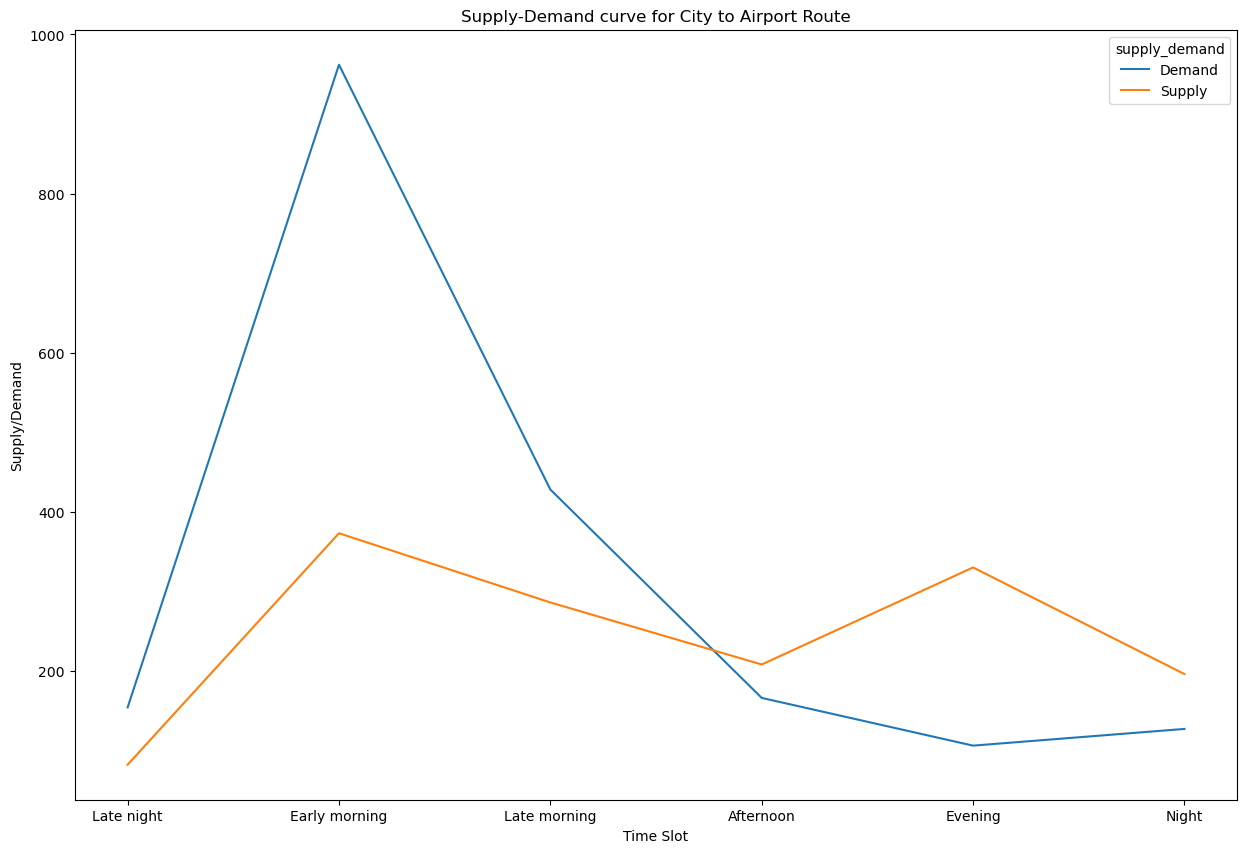

In [86]:
df_citytoairport= df_uber[df_uber["Pickup point"].str.contains('City')==True]

### Plotting a line graph of demand and supply in the city
df_citytoairport.groupby(['Request hour slot','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for City to Airport Route')
plt.xlabel('Time Slot')
plt.ylabel('Supply/Demand')
plt.show()

Most problematic time is the early morning slot where there is a significant gap in demand and supply

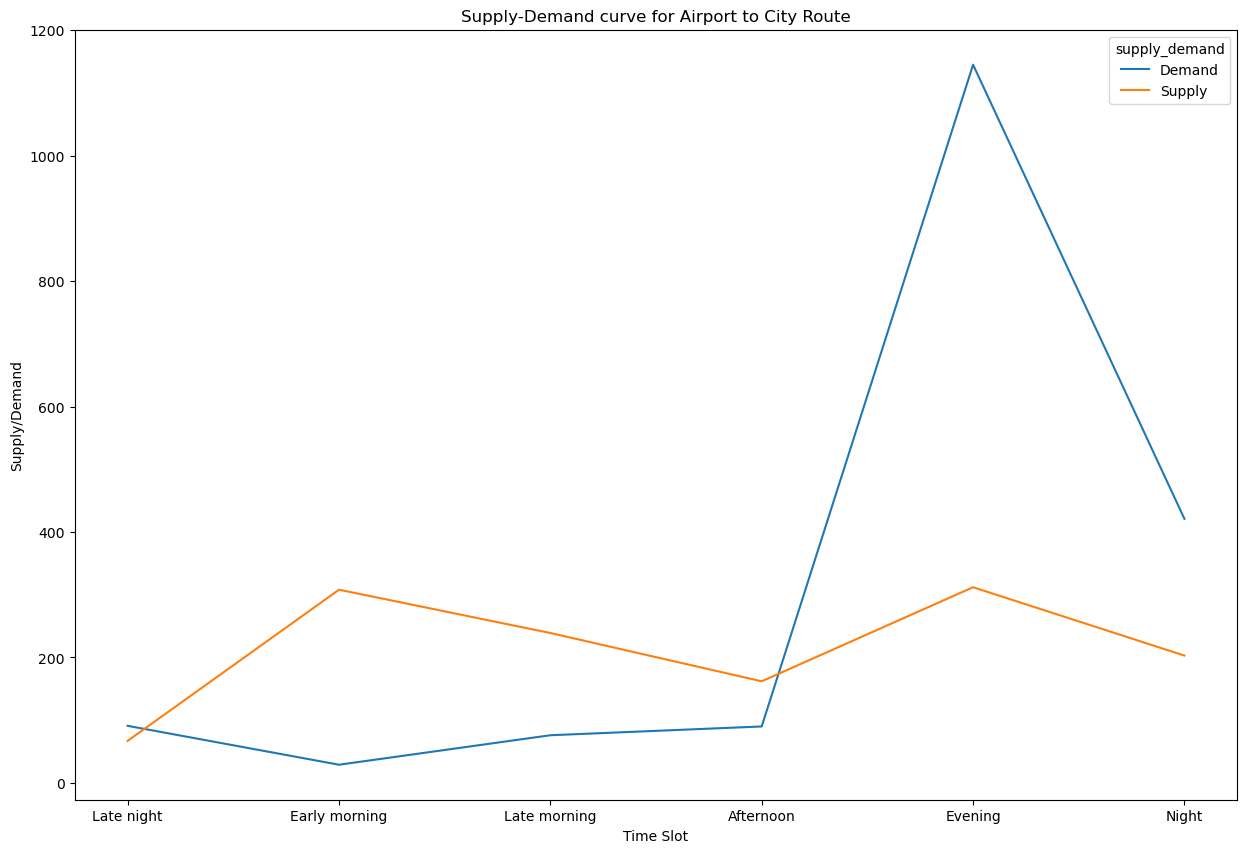

In [87]:
#Plotting Supply and Demand line graph for the airport

df_airport_to_city = df_uber[df_uber["Pickup point"].str.contains('Airport')==True]

df_airport_to_city.groupby(['Request hour slot','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Time Slot')
plt.ylabel('Supply/Demand')
plt.show()

During evening there is a huge gap in supply and demand. 
There is a huge demand which is not met by Uber for the passengers travelling from airport to the city
Only 300 cabs or drivers are available over the whole day currently to service all requests.
“Passengers” generate the demand, “Drivers” supply the demand.

In [90]:
airport_status = airport.Status.value_counts()

In [91]:
airport_status

No Cars Available    1713
Trip Completed       1327
Cancelled             198
Name: Status, dtype: int64

In [92]:
city_status= city.Status.value_counts()

In [93]:
city_status

Trip Completed       1504
Cancelled            1066
No Cars Available     937
Name: Status, dtype: int64

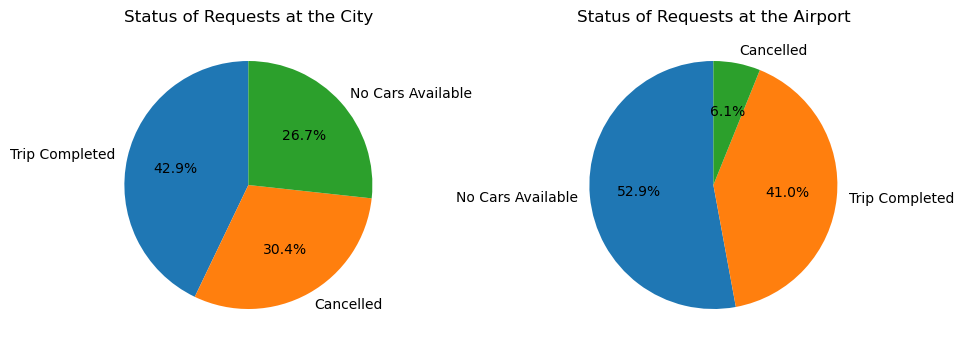

In [97]:
labels1= ['Trip Completed', 'Cancelled', 'No Cars Available']
labels2=['No Cars Available', 'Trip Completed', 'Cancelled']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart 1
ax1.set_title('Status of Requests at the City')
ax1.pie(city_status, labels= labels1, autopct= '%1.1f%%', startangle=90)

# Pie chart 2
ax2.set_title('Status of Requests at the Airport')
ax2.pie(airport_status, labels= labels2, autopct= '%1.1f%%', startangle=90)

plt.subplots_adjust(wspace=0.5)
plt.show()
